# Prediction of H1N1 and Seasonal Flu Vaccinations
## 1. Introduction


### 1.1 Problem Statement
### 1.2 Main Objective
The goal of this project is to create a model that can predict vaccine uptake based on a person's background and behavioral patterns.
## 1.3 Metric for Success
## 1.4 Experimental Design

## 1.5 Data Description
The datasets used for this project were downloaded from [Driven Data]("https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/). The original data source is the [National 2009 H1N1 Flu Survey (NHFS)](https://webarchive.loc.gov/all/20140511165905/http://www.cdc.gov/nchs/nis/data_files_h1n1.htm) and it contains information on the social,economic and demographic backgrounds of the respondents as well as their opinions on the H1N1 and seasonal flu vaccines. The datasets have been divided into the training set features, the training set labels and the test set features. The training data has 26707 rows and 36 columns. The information contained with the columns is as follows as described by the data [dictionary](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/):

|No.| Column    | Description|
|---| ---       | ---         |
|1| `respondent_id` | Unique and random identifier for the respondents|
|2|`h1n1_concern`| Level of concern about H1N1 flu with 0 being not concerned at all and 3 being very concerned|
|3|`h1n1_knowledge`| Level of knowledge about H1N1 with 0 being no knowledge and 2 being a lot of knowledge|
|4|`behavioral_antiviral_meds`| Has taken any antiviral medication (0-no,1-yes)|
|5|`behavioral_avoidance`| Has avoided close contact with anyone with flu-like symptoms (0-no,1-yes)|
|6|`behavioral_face_mask`| Has bought a face mask (0-no,1-yes)|
|7|`behavioral_wash_hands`| Has frequently washed hands or used hand sanitizer (0-no,1-yes)|
|8|`behavioral_large_gatherings`| Has reduced time at large gatherings (0-no,1-yes)|
|9|`behavioral_outside_home`| Has reduced contact with people outside of own household (0-no,1-yes)|
|10|`behavioral_touch_face`| Has avoided touching eyes, nose or mouth (0-no,1-yes)|
|11|`doctor_recc_h1n1`| H1N1 flu vaccine was recommended by doctor (0-no,1-yes)|
|12|`doctor_recc_seasonal`| H1N1 flu vaccine was recommended by doctor (0-no,1-yes)|
|13|`chronic_med_condition`| Has any of the following chronic conditions: asthma or any lung condition, a heart condition, a kidney condition, sickle cell anaemia or any other anaemia, a neurological or neouromuscular condition, a liver condition, or a weakened immune system as a result of a chronic illness or medicines taken for a chronic illness (0-no,1-yes)|
|14|`child_under_6_months`| Has regular close contact with a child under the age of six months (0-no,1-yes)|
|15|`health_worker`| Is a healthcare worker (0-no,1-yes)|
|16|`health_insurance`| Has health insurance (0-no,1-yes)|
|17|`opinion_h1n1_vacc_effective`| Respondent's opinion on the efficacy of the vaccine with 1 being not at all effective and 5 being very effective|
|18|`opinion_h1n1_risk`| Respondent's opinion about risk of getting sick with H1N1 flu without vaccine with 1 being very low and 5 being very high|
|19|`opinion_h1n1_sick_from_vacc`| Respondent's worry of getting sick from H1N1 vaccine with 1 being not worried at all and 5 being very worried|
|20|`opinion_seas_vacc_effective`| Respondent's opinion about seasonal flu vaccine effectiveness with 1 being not effective at all and 5 being very effective|
|21|`opinion_seas_risk`| Respondent's opinion about risk of getting sick with seasonal flu without vaccine with 1 being very low and 5 being very high|
|22|`opinion_seas_sick_from_vacc`| Respondent's worry of getting sick from taking seasonal flu vaccine with 1 being not worried at all and 5 being very worried|
|23|`age_group`| Age group of respondents|
|24|`education`| Self-reported educational level|
|25|`race`| Race of respondent|
|26|`sex`| Sex of respondent|
|27|`income_poverty`| Household annual income of respondent with respect to 2008 Census poverty thresholds|
|28|`marital status`| Marital status of respondent|
|29|`rent_or_own`| Housing situation of respondent|
|30|`employment_status`| Employment status of respondent|
|31|`hhs_geo_region`| Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings|
|32|`census_msa`| Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census|
|33|`household_adults`| Number of *other* adults in the household, top-coded to 3|
|34|`household_children`| Number of children in the household, top-coded to 3|
|35|`employment_industry`| Type of industry respondent is employed in. Values are represented as short random character strings|
|36|`employment_occupation`| Type of occupation of respondent.Values are represented as short random character strings| 

## 2. Reading the Data

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
# setting maximum number of columns to be displayed
pd.set_option('display.max_columns',100)

In [3]:
# loading training features into a dataframe and previewing first five rows
train_features_df = pd.read_csv("Dataset/training_set_features.csv",index_col = "respondent_id")
train_features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
# loading training labels into a dataframe and previewing first five rows
train_label_df = pd.read_csv("Dataset/training_set_labels.csv",index_col = "respondent_id")
train_label_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [5]:
# assert that the respondent_id in features and labels column are the same in order to merge
assert train_features_df.index.equals(train_label_df.index)

In [6]:
# joining the two dataframes
data = train_features_df.join(train_label_df)
data.shape

(26707, 37)

## 3. Assessing the Data

In [7]:
# previewing the last five rows
data.tail()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0
26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0


In [8]:
# previewing number of rows and columns
data.shape

(26707, 37)

In [26]:
# previewing the datatypes
data.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [10]:
# previewing summary statistics of columns
data.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [11]:
# checking for duplicates
data.duplicated().sum()

0

In [12]:
# checking for missing values
missing = data.isna().sum().to_frame().sort_values(0,ascending = False)
missing

,0
employment_occupation,13470
employment_industry,13330
health_insurance,12274
income_poverty,4423
doctor_recc_h1n1,2160
doctor_recc_seasonal,2160
rent_or_own,2042
employment_status,1463
marital_status,1408
education,1407


In [13]:
# checking for distribution of target ie h1n1_vaccine and seasonal vaccine
print(f"Count of people vaccinated against H1N1: \n{data.h1n1_vaccine.value_counts()}\n")
print(f"Percentage of people vaccinated against H1N1: \n{data.h1n1_vaccine.value_counts(normalize = True)}\n")
print(f"Count of people vaccinated against seasonal flu: \n{data.seasonal_vaccine.value_counts()}\n")
print(f"Percentage of people vaccinated against seasonal flu: \n{data.seasonal_vaccine.value_counts(normalize = True)}\n")

Count of people vaccinated against H1N1: 
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

Percentage of people vaccinated against H1N1: 
0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

Count of people vaccinated against seasonal flu: 
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

Percentage of people vaccinated against seasonal flu: 
0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64



### Key Observations
* Most columns with float datatype are categorical in nature with values ranging from 0-5.
* There are no duplicate rows
* Almost all columns have missing values
* The columns, hhs_geo_region, employment_industry and employment_occupation are encoded with random strings, possibly to anonymise the data, they will need to be replaced with numbers for readability
* There is a class imbalance issue in the h1n1_vaccine column, a model predicting only 0s (person is not vaccinated) would be correct 78% of the time

## 4. Exploratory Data Analysis
### 4.1 Univariate 
This section mainly explores the distribution of certain features
#### 4.1.1 Distribution of age

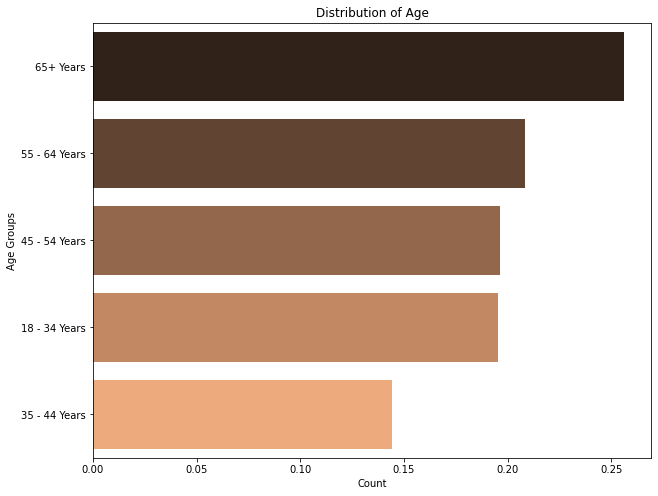

In [167]:
fig,ax = plt.subplots(figsize = (10,8))

y = data.age_group.value_counts(normalize=True,ascending=False).index
x = data.age_group.value_counts(normalize=True,ascending=False)
sns.barplot(x=x,y=y, palette="copper",orient="h")
ax.set_xlabel("Count")
ax.set_ylabel("Age Groups")
ax.set_title("Distribution of Age");

#### 4.1.2 Distribution of Gender

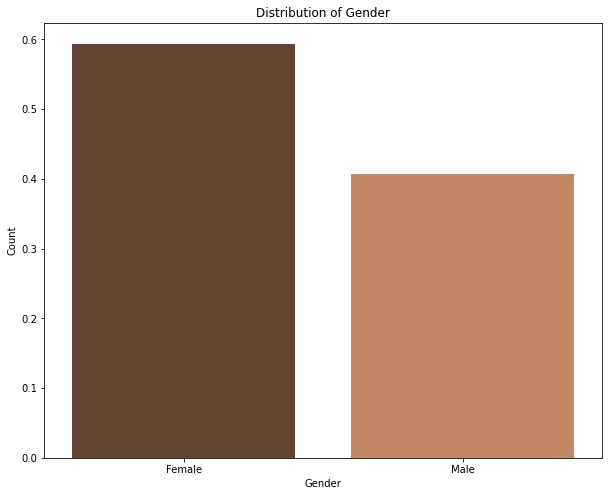

In [145]:
fig,ax = plt.subplots(figsize = (10,8))

x = data.sex.value_counts(normalize=True).index
y = data.sex.value_counts(normalize=True)
sns.barplot(x=x,y=y, palette="copper")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Distribution of Gender")
plt.xticks(rotation=0);

#### 4.1.3 Distribution of Education

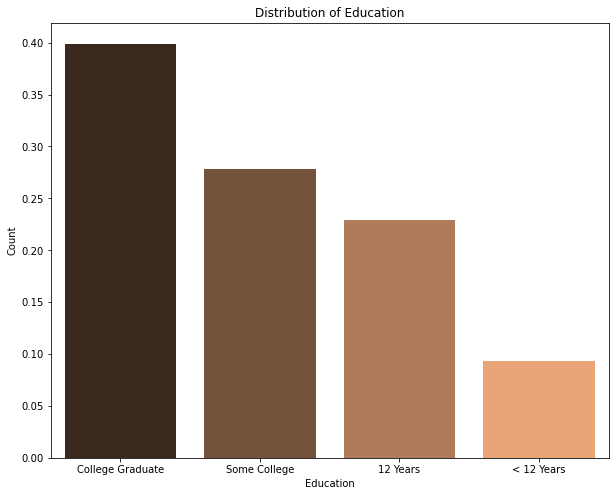

In [146]:
fig,ax = plt.subplots(figsize = (10,8))

x = data.education.value_counts(normalize=True).index
y = data.education.value_counts(normalize=True)
sns.barplot(x=x,y=y, palette="copper")
ax.set_xlabel("Education")
ax.set_ylabel("Count")
ax.set_title("Distribution of Education")
plt.xticks(rotation=0);

#### 4.1.4 Distribution of Race

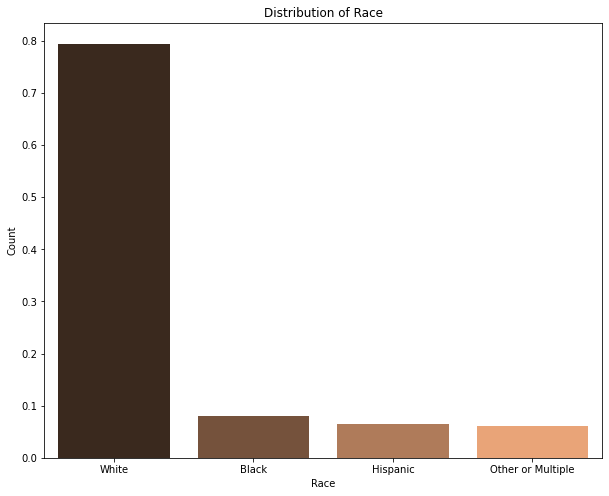

In [147]:
fig,ax = plt.subplots(figsize = (10,8))

x = data.race.value_counts(normalize=True).index
y = data.race.value_counts(normalize=True)
sns.barplot(x=x,y=y, palette="copper")
ax.set_xlabel("Race")
ax.set_ylabel("Count")
ax.set_title("Distribution of Race")
plt.xticks(rotation=0);

#### 4.1.5 Distribution of Income Status

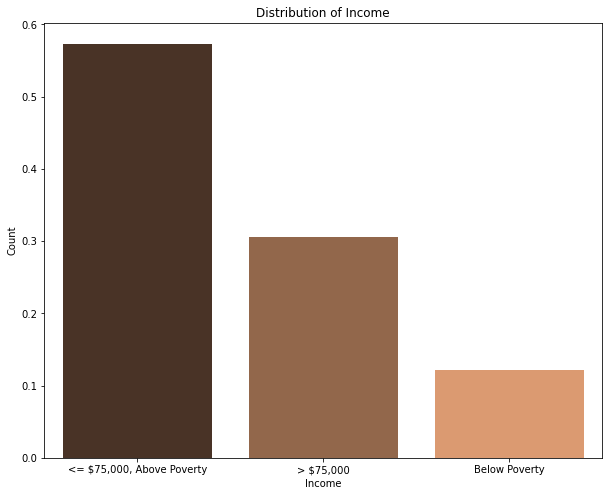

In [148]:
fig,ax = plt.subplots(figsize = (10,8))

x = data.income_poverty.value_counts(normalize=True).index
y = data.income_poverty.value_counts(normalize=True)
sns.barplot(x=x,y=y, palette="copper")
ax.set_xlabel("Income")
ax.set_ylabel("Count")
ax.set_title("Distribution of Income")
plt.xticks(rotation=0);

#### 4.1.5 Distribution of Employment Status

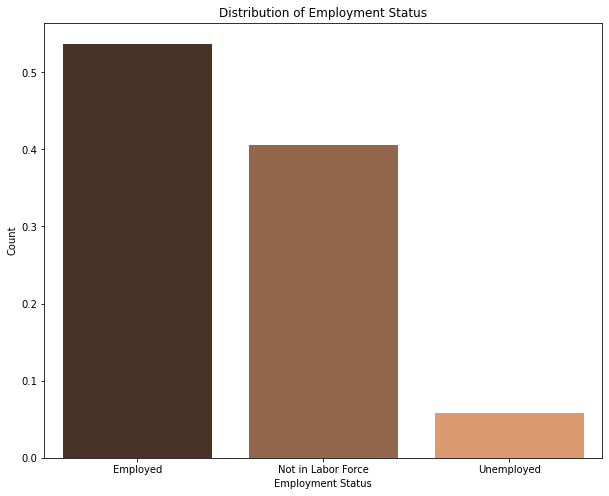

In [153]:
fig,ax = plt.subplots(figsize = (10,8))

x = data.employment_status.value_counts(normalize=True).index
y = data.employment_status.value_counts(normalize=True)
sns.barplot(x=x,y=y, palette="copper")
ax.set_xlabel("Employment Status")
ax.set_ylabel("Count")
ax.set_title("Distribution of Employment Status")
plt.xticks(rotation=0);

#### Key Observations
* Majority of the respondents are above 65 years of age though variance between the groups is quite low.
* Almost 60% of the respondents are female.
* Most of the respondents are college graduates
* People identifying as white dominate the dataset at around 80%.
* Close to 60% of the respondents earn between the poverty line and around $75,000 annually.
* Most of the respondents are employed

### 4.2 Bivariate 
#### 4.2.1 Relationship between H1N1 concern and H1N1 vaccine uptake

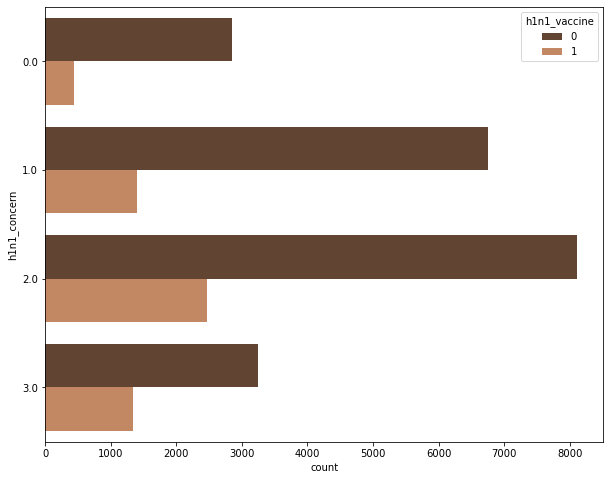

In [181]:
fig,ax = plt.subplots(figsize=(10,8))

sns.countplot(y = data.h1n1_concern,hue = data.h1n1_vaccine,palette="copper",orient = "h");

## 4. Data Cleaning
This section aims to deal apply data cleaning techniques in order to prepare the data for exploratory data analysis. It addresses missing data, wrong data types, invalid datatypes and any feature engineering needed.

### 4.1 Missing values
##### `employment_occupation` and `employment_industry` column
These columns hava 13470 and 13330 missing values which account for 50% of the dataset. The missing values can be replaced with word "missing"

In [14]:
# replacing missing values in the mentioned columns
data.fillna({"employment_occupation":"missing","employment_industry":"missing"},inplace = True)

##### `health_insurance` column
This column has 12274 missing values. It can be assumed that the missing values are for people without health insurance that replacing missing values with 0

In [15]:
# replacing missing values in this column
data.fillna({"health_insurance": 0},inplace = True)

##### `employment_status` column
This column has 1463

In [16]:
data.income_poverty.value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [17]:
4423/26707

0.16561201183210394

In [18]:
data[data.doctor_recc_h1n1.isnull()].index.equals(data[data.doctor_recc_seasonal.isnull()].index)

True

In [20]:
data.isna().sum().to_frame().sort_values(0,ascending = False)

,0
income_poverty,4423
doctor_recc_seasonal,2160
doctor_recc_h1n1,2160
rent_or_own,2042
employment_status,1463
marital_status,1408
education,1407
chronic_med_condition,971
child_under_6_months,820
health_worker,804


In [22]:
df2 = data.corr().abs().stack().reset_index().sort_values(0,ascending = False)
df2["pairs"] = list(zip(df2.level_0,df2.level_1))
df2.set_index(["pairs"],inplace = True)
df2.drop(columns = ["level_1","level_0"],inplace=True)
df2.columns = ["cc"]
df2.drop_duplicates(inplace = True) 

In [25]:
df2[:15]

,cc
pairs,
"(h1n1_concern, h1n1_concern)",1.000000
"(doctor_recc_seasonal, doctor_recc_h1n1)",0.591868
"(behavioral_outside_home, behavioral_large_gatherings)",0.584085
"(opinion_h1n1_risk, opinion_seas_risk)",0.564208
"(opinion_seas_sick_from_vacc, opinion_h1n1_sick_from_vacc)",0.491546
"(opinion_h1n1_vacc_effective, opinion_seas_vacc_effective)",0.472467
"(doctor_recc_h1n1, h1n1_vaccine)",0.393890
"(opinion_seas_risk, seasonal_vaccine)",0.390106
"(seasonal_vaccine, h1n1_vaccine)",0.377143
